#### Monte Hall Problem :
    Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

### Solving using Simulation
    You should switch. But why?

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Simulation Function 

In [2]:
def monty_hall_game_single_round(switch = True):
    
    doors = [1, 2, 3]  #three doors
    
    # Choose a door that has car behind it
    car_door = np.random.choice(doors, 1)
    
    # Player picks a door at random
    player_initial_choice = np.random.choice(doors, 1) 
    
    # Doors which are not picked by the player
    remaining_doors = [door for door in doors if door != player_initial_choice]
    
    # Host chooses a door from the remaining doors that doesn't have car behind it
    ## (if the player chooses the car door, then the host chooses one of the remaining doors randomly, 
    ## otherwise he has only one choice )
    
    host_opens = np.random.choice([door for door in remaining_doors if door not in [car_door, player_initial_choice]], 1) 
    
    if switch:
        # Player switches to an available door which the host didn't open
        player_choice = [door for door in remaining_doors if door not in [player_initial_choice, host_opens]]
    
    else:
        # Player sticks to the initial selection
        player_choice = player_initial_choice 
        
    playerWins = True if player_choice == car_door else False
    
    return playerWins

### Run the game multiple times

In [3]:
def resultAfterDrawingMutipleSamples(num_iters):
    
    wins_with_switching = [monty_hall_game_single_round(switch = True) for iteration in range(num_iters)]
    wins_without_switching = [monty_hall_game_single_round(switch = False) for iteration in range(num_iters)]
    
    return wins_with_switching, wins_without_switching

In [4]:
number_of_rounds = 10000
wins_with_switching, wins_without_switching = resultAfterDrawingMutipleSamples(number_of_rounds)

### Result

Win Percentage with Switching: 0.6639
Win Percentage without Switching: 0.3333


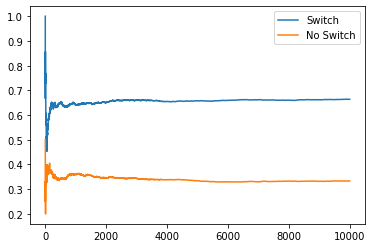

In [5]:
print("Win Percentage with Switching:", sum(wins_with_switching) / number_of_rounds)
print("Win Percentage without Switching:", sum(wins_without_switching) / number_of_rounds)

rolling_mean_switch = [sum(wins_with_switching[:i+1])/(i+1) for i in range(1, number_of_rounds)]
rolling_mean_noSwitch = [sum(wins_without_switching[:i+1])/(i+1) for i in range(1, number_of_rounds)]

plt.plot(rolling_mean_switch)
plt.plot(rolling_mean_noSwitch)
plt.legend(['Switch', 'No Switch'])